## Visualizing Fire Scars through False Color
Author: Joaquin Sandoval 

Github repository: https://github.com/sandovaljoaquin/eds220-hwk4


## About 

The purpose of this notebook is to create a false color image of both the Eaton and Palisades Fires in the Los Angeles area using remote sensing data and identify the resulting fire scar.


### Highlights : 
- Fire perimeter boundary data import and exploration 
- Landsat data import and exploration as an `xarray.Dataset`
- Restoring geospatial information to an `xarray.Dataset`
- Plotting (1) True-Color Image and (2) False Color Images with fire perimeter boundaries 


### About the data: 

There are three datasets used in this analysis. 

(1) `eaton_boundary`: layer contains dissolved fire perimeter/boundary for Eaton Fire. 
(01/21/2025)

(2) `palisades_boundary`: layer contains dissolved fire perimeter/boundary for Palisades Fire. (01/21/2025)

(3) `landsat`: simplified collection of bands (red, green, blue, near-infrared, and shortwave infrared) from the Landsat Collection 2 Level-2 atmospherically correxted surface reflected data collected by the Landsat 8 satellite. This data was clipped to an area of Los Angeles County to include both fire perimeter, 


### References: 

(1) and (2): 

Credit: NIFC FIRIS
The source of the hosted service/dataset is here
https://services1.arcgis.com/jUJYIo9tSA7EHvfZ/ArcGIS/rest/services/CA_Perimeters_NIFC_FIRIS_public_view/FeatureServer

(3) Microsoft Planetary Computer. (n.d.). Landsat C2 L2. Microsoft Planetary Computer. Retrieved November 19, 2025, from https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2




## Begin Visualization 

Import necessary packages.

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr 

## Fire perimeter data exploration

Import both perimeters for the Eaton and Palisades Fires and perform preliminary data analysis. This analysis should include each dataset's CRS, datum, and whether it is projected or geographic. 

In [5]:
# Import perimeter of eaton fire 
fp = os.path.join("data", "Eaton_Perimeter_20250121", "Eaton_Perimeter_20250121.shp")
eaton_boundary = gpd.read_file(fp)

# Import perimeter of palisades fire 
fp = os.path.join("data", "Palisades_Perimeter_20250121", "Palisades_Perimeter_20250121.shp")
palisades_boundary = gpd.read_file(fp)

In [6]:
# Examine CRS details of `eaton_boundary`
print(f"CRS of eaton_boundary: {eaton_boundary.crs}")
print('Datum', eaton_boundary.crs.datum)
print('Is geographic?', eaton_boundary.crs.is_geographic)
print('Is projected?', eaton_boundary.crs.is_projected)

CRS of eaton_boundary: EPSG:3857
Datum World Geodetic System 1984 ensemble
Is geographic? False
Is projected? True


In [7]:
# Examine CRS details of `palisades_boundary`
print(f"CRS of palisades_boundary: {palisades_boundary.crs}")
print('Datum', palisades_boundary.crs.datum)
print('Is geographic?', palisades_boundary.crs.is_geographic)
print('Is projected?', palisades_boundary.crs.is_projected)

CRS of palisades_boundary: EPSG:3857
Datum World Geodetic System 1984 ensemble
Is geographic? False
Is projected? True


## NetCDF data import and exploration

Import the landsat dataset as an `xarray.Dataset` and perform preliminary exploration. Identify the variables, dimensions, and coordinates of the `xarray.Dataset`

In [8]:
# Import landsat data using `xr.open_dataset()`
landsat = xr.open_dataset('data/landsat8-2025-02-23-palisades-eaton.nc')

In [25]:
landsat.head()

<xarray.Dataset> Size: 596B
Dimensions:      (y: 5, x: 5)
Coordinates:
  * y            (y) float64 40B 3.799e+06 3.799e+06 ... 3.799e+06 3.799e+06
  * x            (x) float64 40B 3.344e+05 3.344e+05 ... 3.345e+05 3.345e+05
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float32 100B 1.024e+04 9.886e+03 ... 9.967e+03 9.885e+03
    green        (y, x) float32 100B 9.93e+03 9.687e+03 ... 9.674e+03 9.604e+03
    blue         (y, x) float32 100B 9.29e+03 9.183e+03 ... 9.211e+03 9.186e+03
    nir08        (y, x) float32 100B 1.331e+04 1.313e+04 ... 1.271e+04 1.258e+04
    swir22       (y, x) float32 100B 1.43e+04 1.437e+04 ... 1.43e+04 1.444e+04

### Dimensions: 

(y:5, x:5). The xarray dataset is a 5 x 5 grid defining the shape of the xarray dataset. 

### Coordinates:

x, y: coordinate values for the grid axis. 

time : spatial coordinate for the temporal axis of the xarray dataset.

spatial_ref : spatial reference information which contains no data. This will be solved in the following step of the notebook. 

### Data varibales: 

red, green, blue: visible spectral bands 
nir08:  near-infrared band
swir22: short-wave infrared band 

## Restoring Geospatial Information

The next section of this notebook will focus on restoring the geospatial information of the xarray dataset. This will involve obtaining the CRS using the `spatial_ref.crs_wkt`attribute and then adding it back to the xarray dataset.

In [10]:
# Using rio.crs to print CRS of the dataset
print(landsat.rio.crs)

None


In [11]:
# Geospatial information for dataset stored in `spatial_ref`
# Print CRS of `landsat` by accessing `spatial_ref.crs_wkt` attribute
print(landsat.spatial_ref.crs_wkt)

PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


In [12]:
# Recover geospatial information by using `rio.write_crs()` and the spatial reference information 
landsat = landsat.rio.write_crs(landsat.spatial_ref.crs_wkt)

In [13]:
# Print the  CRS of updated `landsat` dataset 
print(landsat.rio.crs)

EPSG:32611


## True Color Image 
With `landsat` now containing geospatial information, it can be plotted. To plot a true color image, the r,g,b bands have to be selected from the dataset. Use plot.imshow() to display raster data.

In [14]:
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


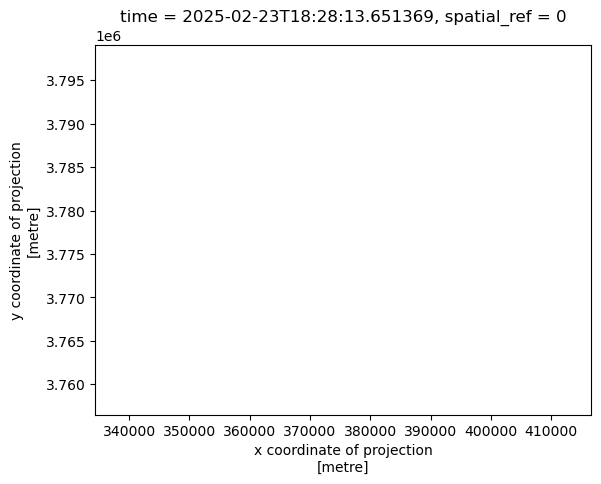

In [15]:
# Select the red, green, and blue variables of the xarray.Dataset holding the Landsat data

landsat[['red','green','blue']].to_array().plot.imshow()


The above plot is empty. The plot.imshow() arguments of vmax and robust need to be changed and nan values need to be removed from the xarray data set. Check each band to see if there are nans present and remove if so.

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


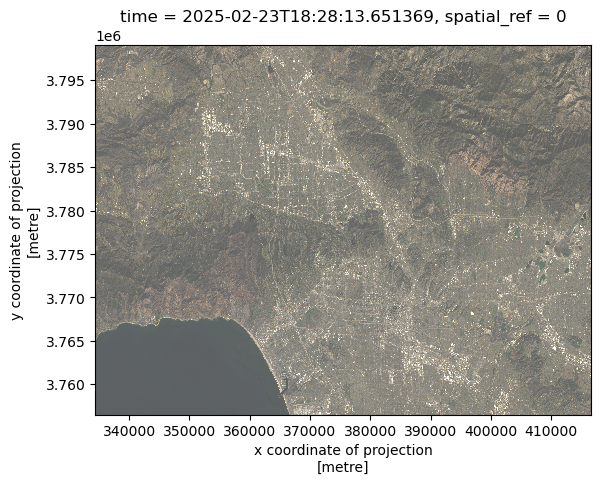

In [16]:
# Adjust the scale used for plotting the bands to get a true color image
landsat[['red','green','blue']].to_array().plot.imshow(vmin = 0, 
                                                       vmax = 20000, 
                                                       robust = True)

In [17]:
# Check if red band has nan values
np.isnan(landsat['red']).any()

<xarray.DataArray 'red' ()> Size: 1B
array(False)
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0

In [18]:
# Check if green band has na values 
np.isnan(landsat['green']).any()

<xarray.DataArray 'green' ()> Size: 1B
array(True)
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0

In [19]:
# Check if blue band has nan values 
np.isnan(landsat['blue']).any()

<xarray.DataArray 'blue' ()> Size: 1B
array(True)
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0

Plot the true color image with `landsat` with no nans.

In [20]:
# Using .fillna() to substitute the nan values with 0 
landsat['green'] = landsat['green'].fillna(0)
landsat['blue'] = landsat['blue'].fillna(0)

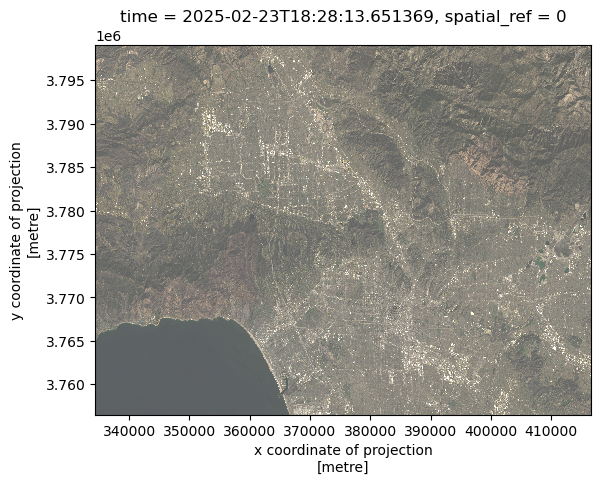

In [21]:
# Plot new true color image without warnings 
landsat[['red','green','blue']].to_array().plot.imshow(vmin = 0, 
                                                       vmax = 20000, 
                                                       robust = True)

 Comparing the ouputs for parts (a) and (e).

The output of part (a) had the correct window; y and x coordinates of projection, but did not have any data from the red, green, or blue bands plotted. It had the following warnings: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

invalid value encountered in cast xx = (xx * 255).astype(np.uint8)

The output of part (e) had the correct window and plotted the rgb values after setting the vmax parameter much higher and the robust paramter equal to true. 

##  False color image

Plot the false color image of `landsat` by selecting the short-wave infrared, near-wave infrared, and red bands in this order.

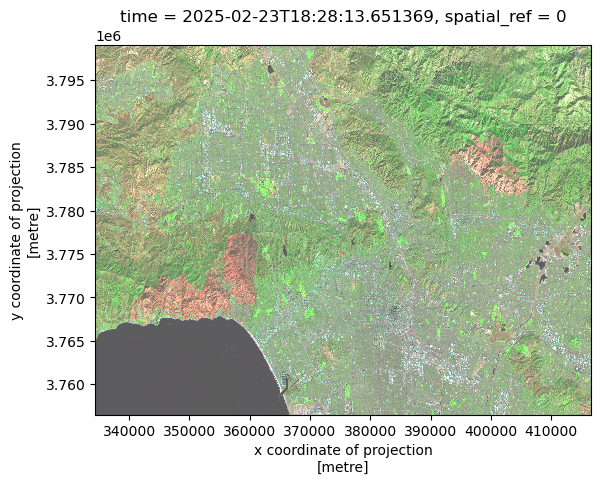

In [22]:
# Plot false color image with short-wave infared, near-infared, and red variables 
landsat[['swir22','nir08','red']].to_array().plot.imshow(vmin = 0, 
                                                       vmax = 20000, 
                                                       robust = True)

## 7. Map

Plot the false color image generated along with both `eaton_boundary` and `palisades_boundary`. `landsat` has a different crs than both boundaries. Convert the CRS of the boundary data to the CRS if the landsat data.

In [23]:
# Convert  to CRS of both fire boundaries to landsat CRS

eaton_boundary = eaton_boundary.to_crs(landsat.rio.crs)
palisades_boundary = palisades_boundary.to_crs(landsat.rio.crs)


(334395.0, 416655.0, 3756525.0, 3799065.0)

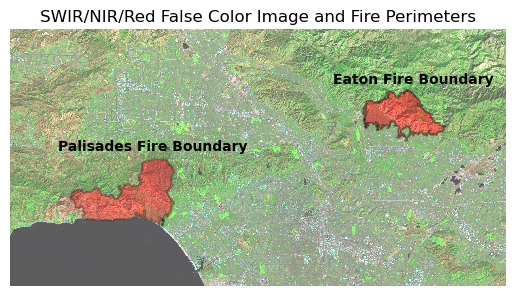

In [24]:
# Shortwave infrared/near-infrared/red false color image together with both fire perimeters
fig, ax = plt.subplots()

landsat[['swir22','nir08','red']].to_array().plot.imshow(vmin = 0, 
                                                       vmax = 20000, 
                                                       robust = True)
                                                      

eaton_boundary.plot(ax=ax,         
                 edgecolor='black',
                 color = 'red',
                 linewidth=1.25, 
                 alpha = .4)

palisades_boundary.plot(ax=ax,        
                edgecolor = 'black',
                color = 'red',
                linewidth= 1.25, 
                alpha = .3)

plt.figtext(x = .63, 
            y = .65,
            s ="Eaton Fire Boundary", 
            weight = 'bold')

plt.figtext(x = .2, 
            y = .51,
            s ="Palisades Fire Boundary", 
            weight = 'bold')
ax.set_title("SWIR/NIR/Red False Color Image and Fire Perimeters")
ax.axis('off')